# Feature engineering
pg 375

In [17]:
import pandas as pd
import numpy as np

### Categoricas

In [1]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

No codificar con números 1,2,3,4 ya que los modelos piensan que unos van detras de otros o que son más importantes. 
Se usa `one-hot encoding`. Crea columnas que indica si tiene esa categoría o no.

In [2]:
from sklearn.feature_extraction import DictVectorizer

In [9]:
vec = DictVectorizer(sparse=False, dtype=int)

In [10]:
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [12]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [13]:
vec = DictVectorizer(sparse=True, dtype=int)

In [15]:
new_data = vec.fit_transform(data)

In [16]:
new_data

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [27]:
df = pd.DataFrame(new_data.toarray(), columns=vec.get_feature_names())

In [28]:
df

,neighborhood=Fremont,neighborhood=Queen Anne,neighborhood=Wallingford,price,rooms
0,0,1,0,850000,4
1,1,0,0,700000,3
2,0,0,1,650000,3
3,1,0,0,600000,2


In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
df_test = pd.DataFrame(data)

In [36]:
df_test

,price,rooms,neighborhood
0,850000,4,Queen Anne
1,700000,3,Fremont
2,650000,3,Wallingford
3,600000,2,Fremont


In [39]:
encoder = OneHotEncoder(dtype=int)

In [43]:
encoder.fit_transform(df_test[['neighborhood']])

<4x3 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [44]:
encoder.get_feature_names()

array(['x0_Fremont', 'x0_Queen Anne', 'x0_Wallingford'], dtype=object)

In [48]:
# Hay que pasar la columna añadiendo una dimensión más.
encoder_df = pd.DataFrame(encoder.fit_transform(df_test[['neighborhood']]).toarray(), columns=encoder.get_feature_names())

In [49]:
encoder_df

,x0_Fremont,x0_Queen Anne,x0_Wallingford
0,0,1,0
1,1,0,0
2,0,0,1
3,1,0,0


In [50]:
df_test.join(encoder_df)

,price,rooms,neighborhood,x0_Fremont,x0_Queen Anne,x0_Wallingford
0,850000,4,Queen Anne,0,1,0
1,700000,3,Fremont,1,0,0
2,650000,3,Wallingford,0,0,1
3,600000,2,Fremont,1,0,0


### Texto

Un método muy sencillo es `word_counts`

In [51]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [53]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


El problema de esta aproximación es que da mucho peso a palabras que aparecen muy frecuentemente pero no son importantes. Otra aproximación para solucinar esto es `term-frecuency-inverse document frequency`

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


### Derivados

Transformar los datos de entrada sin cambiar el modelo. Conocido como `basis function regression`

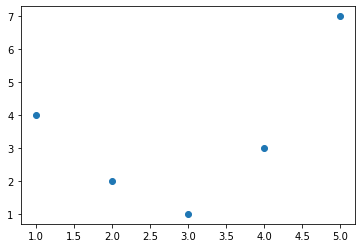

In [73]:
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

In [74]:
from sklearn.linear_model import LinearRegression

In [80]:
X = x.reshape(5, 1)

In [81]:
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [82]:
model = LinearRegression().fit(X, y)

In [83]:
yfit = model.predict(X)

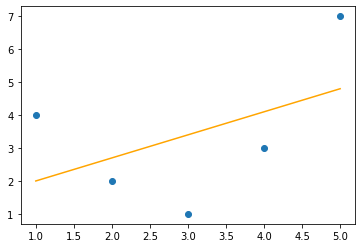

In [89]:
plt.scatter(X, y)
plt.plot(X, yfit, color='orange')

Los datos no pueden ser descritos con una linea... Necestiamos un modelo más complejo. Podemos hacer esto transformando los datos añadiendo `polynomial features`

In [90]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)

In [94]:
# Le añadimos polynomial a nuestros datos X y los transformamos.
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


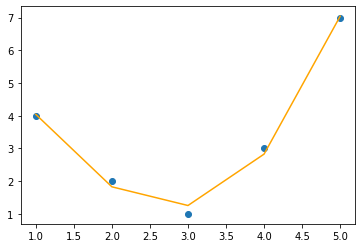

In [95]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit, color='orange');

### Missing Data

In [96]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [98]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [104]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

### Pipelines

Para automatizar todas estas transformaciones

In [106]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

In [107]:
model.fit(X, y)  # X with missing values, from above
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]
